<a href="https://colab.research.google.com/github/ParkEunbin/ML_basic/blob/main/210131_MaxPool2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pooling
Flatten 이후 입력으로 사용될 데이터의 칼럼수증가> params가중치 수 증가 > 입력으로 사용할 칼럼 수를 조정하는 것! (pooling)
- tf.keras.layers.MAxPool2D()() : Maxpool layer를 사용하면 이미지가 절반으로 줄어듬
- MaxPooling : 영역 안에서 가장 큰 숫자를 남겨두는 방식 > 값이 크다= 필터로 찾으려는 특징이 많이 나타난 부분 > 유의미한 정보를 남기면서 사이즈를 줄이는 것
- Average Pooling : 평균값을 나둠

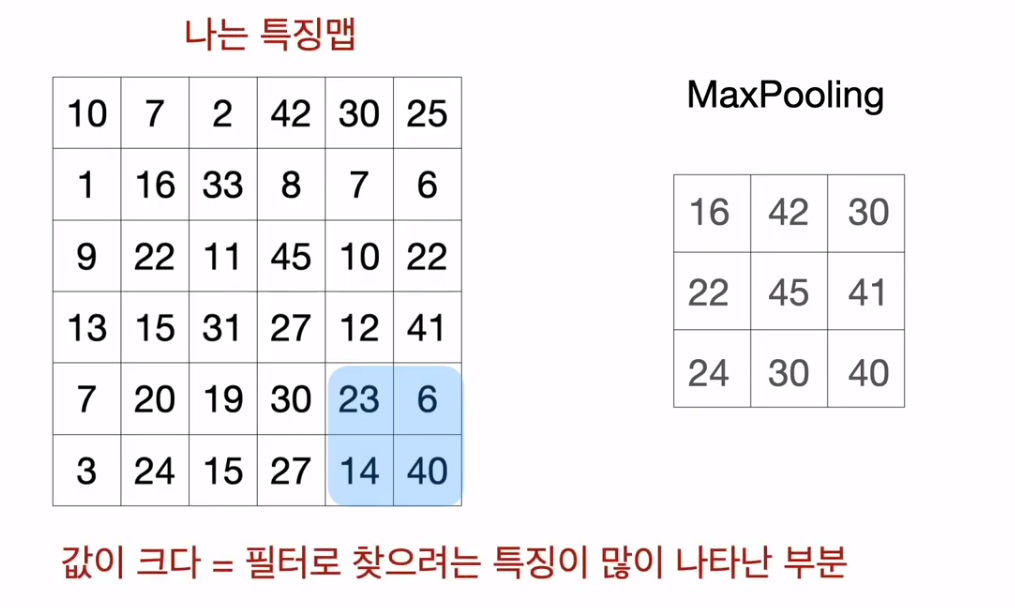

In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
# 1. 데이터 가져오기
(독립,종속),_=tf.keras.datasets.mnist.load_data()
print(독립.shape,종속.shape)

#conv에서는 3차원 형태여야함
독립 = 독립.reshape(60000,28,28,1)
#원핫인코딩
종속 = pd.get_dummies(종속)
print(독립.shape,종속.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(60000, 28, 28, 1) (60000, 10)


In [3]:
# 2. 모델 만들기
X= tf.keras.layers.Input(shape=[28,28,1])
H= tf.keras.layers.Conv2D(3, kernel_size=5, activation='swish')(X) 
H= tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(H)
#여기까지 결과가 이미지 형태로 나옴> 표형태로 바꿔주기
H=tf.keras.layers.Flatten()(H)
H=tf.keras.layers.Dense(84,activation='swish')(H)
Y=tf.keras.layers.Dense(10,activation='softmax')(H)
model=tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy',metrics='accuracy')

In [4]:
model.summary()
#20만개의 가중치가 필요

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 3)         78        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 6)         456       
_________________________________________________________________
flatten (Flatten)            (None, 2400)              0         
_________________________________________________________________
dense (Dense)                (None, 84)                201684    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                850       
Total params: 203,068
Trainable params: 203,068
Non-trainable params: 0
_______________________________________________________

##Pooling layer

In [5]:
# CNN model
X= tf.keras.layers.Input(shape=[28,28,1])

H= tf.keras.layers.Conv2D(3, kernel_size=5, activation='swish')(X) 
#이미지의 사이즈를 Max pooling 으로 줄임
H=tf.keras.layers.MaxPool2D()(H)

H= tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(H)
H=tf.keras.layers.MaxPool2D()(H)

#여기까지 결과가 이미지 형태로 나옴> 표형태로 바꿔주기
H=tf.keras.layers.Flatten()(H)
H=tf.keras.layers.Dense(84,activation='swish')(H)
Y=tf.keras.layers.Dense(10,activation='softmax')(H)
model=tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy',metrics='accuracy')

In [6]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 3)         78        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 6)           456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 6)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 84)                8148

In [7]:
# 3. 모델 학습시키기
model.fit(독립,종속,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 2.2130 - accuracy: 0.8042
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1268 - accuracy: 0.9616
Epoch 3/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0923 - accuracy: 0.9723
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0808 - accuracy: 0.9775
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0718 - accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0669 - accuracy: 0.9798
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0683 - accuracy: 0.9798
Epoch 8/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0603 - accuracy: 0.9819
Epoch 9/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0592 - accuracy: 0.9824
Epoch 10/10
1875/1875 [==============================] - 25s 13m

In [8]:
# 4. 모델 이용하기
pred=model.predict(독립[0:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.00
1,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
2,0.0,0.0,0.0,0.0,0.96,0.0,0.0,0.0,0.0,0.04
3,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
4,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.00


In [9]:
종속[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
